In [7]:
from statsforecast import StatsForecast
from yfinance import Ticker

import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

os.environ['NIXTLA_ID_AS_COL'] = '1'
plt.rcParams['axes.grid'] = True

#### OHLCV of MSFT

- `open`  : price at market open
- `high`  : highest price during the day
- `low`   : lowest price during the day
- `close` : price at market close
- `volume`: number of shares traded

In [8]:
tick = 'MSFT'

# downloading two years of historical price data of Microsoft Corporation - MSFT
df_raw = Ticker(tick).history(period="2y", auto_adjust=True)
df_raw.tail(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-16 00:00:00-05:00,457.829987,463.190002,456.480011,459.859985,34246700,0.0,0.0
2026-01-20 00:00:00-05:00,451.220001,456.799988,449.279999,454.519989,26130000,0.0,0.0
2026-01-21 00:00:00-05:00,452.600006,452.690002,438.679993,444.109985,37980500,0.0,0.0
2026-01-22 00:00:00-05:00,447.619995,452.839996,444.700012,451.140015,25349400,0.0,0.0
2026-01-23 00:00:00-05:00,451.869995,471.100006,450.529999,465.950012,38000200,0.0,0.0
2026-01-26 00:00:00-05:00,465.309998,474.250000,462.000000,470.279999,29291200,0.0,0.0
2026-01-27 00:00:00-05:00,473.700012,482.869995,473.160004,480.579987,29213900,0.0,0.0
2026-01-28 00:00:00-05:00,483.209991,483.739990,478.000000,481.630005,36875400,0.0,0.0
2026-01-29 00:00:00-05:00,439.989990,442.500000,421.019989,433.500000,128855300,0.0,0.0


In [9]:
print("Start date:", df_raw.index.min())
print("End date:  ", df_raw.index.max())

Start date: 2024-02-07 00:00:00-05:00
End date:   2026-02-06 00:00:00-05:00


In [10]:
df = pd.DataFrame({'unique_id': tick, 'ds': df_raw.index.tz_localize(None), 'y': df_raw.Close.values})
df = df[(df.ds >= pd.to_datetime('2024-02-08')) & (df.ds <= pd.to_datetime('2026-02-08')) ]
df.ds = range(df.shape[0])

df.tail()

,unique_id,ds,y
497,MSFT,496,423.369995
498,MSFT,497,411.209991
499,MSFT,498,414.190002
500,MSFT,499,393.670013
501,MSFT,500,401.140015


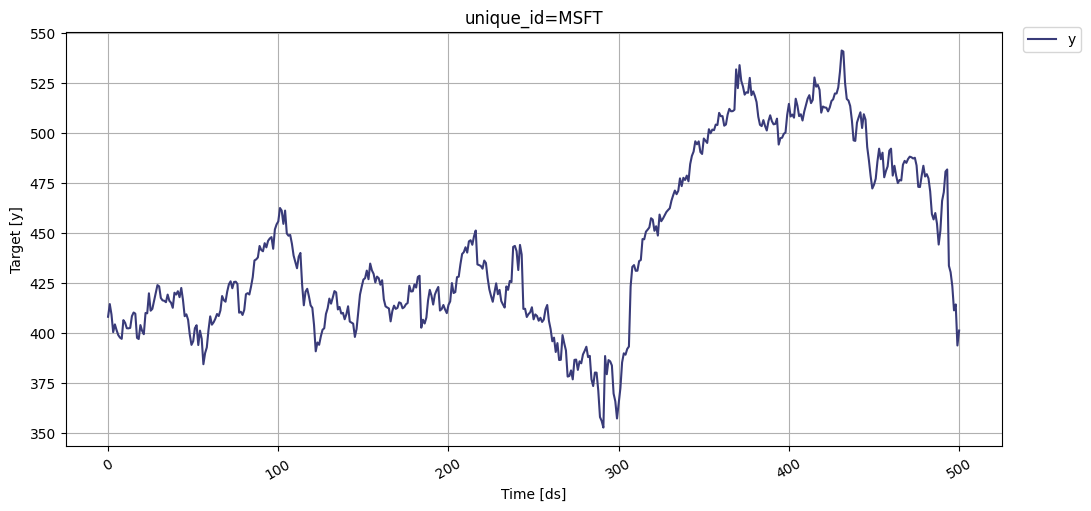

In [11]:
f = StatsForecast.plot(df)
f.set_figwidth(10)
f.set_figheight(5)
f
